# Preprocessing

In [1]:
#Import Library yang diperlukan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import sys
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, TensorDataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [2]:
#Import dataset

datapath = 'C:/Users/Alfi/OneDrive/Kuliah/Semester 8/2. TA/Project/1. Data/Raw/Data Historis ADRO.csv'
dataset = pd.read_csv(datapath)
dataset

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,01/03/2024,2490,2450,2490,2430,"60,14M","2,89%"
1,29/02/2024,2420,2410,2420,2390,"38,75M","0,83%"
2,28/02/2024,2400,2390,2410,2380,"25,90M","0,84%"
3,27/02/2024,2380,2400,2410,2360,"36,58M","0,42%"
4,26/02/2024,2370,2420,2420,2360,"53,68M","-2,07%"
...,...,...,...,...,...,...,...
2426,07/03/2014,1015,1030,1035,1010,"58,49M","-0,49%"
2427,06/03/2014,1020,1015,1025,1000,"57,32M","0,00%"
2428,05/03/2014,1020,1025,1040,1005,"68,20M","0,49%"
2429,04/03/2014,1015,975,1025,970,"150,13M","3,57%"


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2431 entries, 0 to 2430
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tanggal     2431 non-null   object
 1   Terakhir    2431 non-null   int64 
 2   Pembukaan   2431 non-null   int64 
 3   Tertinggi   2431 non-null   int64 
 4   Terendah    2431 non-null   int64 
 5   Vol         2431 non-null   object
 6   Perubahan%  2431 non-null   object
dtypes: int64(4), object(3)
memory usage: 133.1+ KB


In [4]:
dataset.describe()

,Terakhir,Pembukaan,Tertinggi,Terendah
count,2431.000000,2431.000000,2431.000000,2431.000000
mean,1655.400658,1658.623612,1686.603867,1628.712464
std,801.629905,801.661760,813.264532,790.323542
min,437.000000,440.000000,452.000000,437.000000
25%,1120.000000,1120.000000,1145.000000,1100.000000
50%,1390.000000,1395.000000,1415.000000,1360.000000
75%,2040.000000,2040.000000,2070.000000,2000.000000
max,4140.000000,4140.000000,4250.000000,4080.000000


In [5]:
dataset.isna().sum().to_frame(name='num_of_NaN')

,num_of_NaN
Tanggal,0
Terakhir,0
Pembukaan,0
Tertinggi,0
Terendah,0
Vol,0
Perubahan%,0


In [6]:
from datetime import datetime
dataset['Tanggal'] = pd.to_datetime(dataset['Tanggal'],
                                   format = '%d/%m/%Y')
dataset

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2024-03-01,2490,2450,2490,2430,"60,14M","2,89%"
1,2024-02-29,2420,2410,2420,2390,"38,75M","0,83%"
2,2024-02-28,2400,2390,2410,2380,"25,90M","0,84%"
3,2024-02-27,2380,2400,2410,2360,"36,58M","0,42%"
4,2024-02-26,2370,2420,2420,2360,"53,68M","-2,07%"
...,...,...,...,...,...,...,...
2426,2014-03-07,1015,1030,1035,1010,"58,49M","-0,49%"
2427,2014-03-06,1020,1015,1025,1000,"57,32M","0,00%"
2428,2014-03-05,1020,1025,1040,1005,"68,20M","0,49%"
2429,2014-03-04,1015,975,1025,970,"150,13M","3,57%"


In [7]:
dataset = dataset.sort_values(by='Tanggal',
                              ascending = True,
                              ignore_index = True)
dataset

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2014-03-03,980,980,990,970,"41,65M","-1,51%"
1,2014-03-04,1015,975,1025,970,"150,13M","3,57%"
2,2014-03-05,1020,1025,1040,1005,"68,20M","0,49%"
3,2014-03-06,1020,1015,1025,1000,"57,32M","0,00%"
4,2014-03-07,1015,1030,1035,1010,"58,49M","-0,49%"
...,...,...,...,...,...,...,...
2426,2024-02-26,2370,2420,2420,2360,"53,68M","-2,07%"
2427,2024-02-27,2380,2400,2410,2360,"36,58M","0,42%"
2428,2024-02-28,2400,2390,2410,2380,"25,90M","0,84%"
2429,2024-02-29,2420,2410,2420,2390,"38,75M","0,83%"


In [8]:
dataset_B = dataset[dataset['Vol'].str.contains('B')]
print(dataset_B)

Empty DataFrame
Columns: [Tanggal, Terakhir, Pembukaan, Tertinggi, Terendah, Vol, Perubahan%]
Index: []


In [9]:
dataset_M = dataset[dataset['Vol'].str.contains('M')]
print(dataset_M)

        Tanggal  Terakhir  Pembukaan  Tertinggi  Terendah      Vol Perubahan%
0    2014-03-03       980        980        990       970   41,65M     -1,51%
1    2014-03-04      1015        975       1025       970  150,13M      3,57%
2    2014-03-05      1020       1025       1040      1005   68,20M      0,49%
3    2014-03-06      1020       1015       1025      1000   57,32M      0,00%
4    2014-03-07      1015       1030       1035      1010   58,49M     -0,49%
...         ...       ...        ...        ...       ...      ...        ...
2426 2024-02-26      2370       2420       2420      2360   53,68M     -2,07%
2427 2024-02-27      2380       2400       2410      2360   36,58M      0,42%
2428 2024-02-28      2400       2390       2410      2380   25,90M      0,84%
2429 2024-02-29      2420       2410       2420      2390   38,75M      0,83%
2430 2024-03-01      2490       2450       2490      2430   60,14M      2,89%

[2431 rows x 7 columns]


In [10]:
dataset_K = dataset[dataset['Vol'].str.contains('K')]
print(dataset_K)

Empty DataFrame
Columns: [Tanggal, Terakhir, Pembukaan, Tertinggi, Terendah, Vol, Perubahan%]
Index: []


In [11]:
dataset = dataset.replace(to_replace = ',',
                          value = '.',
                          regex = True)
dataset

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2014-03-03,980,980,990,970,41.65M,-1.51%
1,2014-03-04,1015,975,1025,970,150.13M,3.57%
2,2014-03-05,1020,1025,1040,1005,68.20M,0.49%
3,2014-03-06,1020,1015,1025,1000,57.32M,0.00%
4,2014-03-07,1015,1030,1035,1010,58.49M,-0.49%
...,...,...,...,...,...,...,...
2426,2024-02-26,2370,2420,2420,2360,53.68M,-2.07%
2427,2024-02-27,2380,2400,2410,2360,36.58M,0.42%
2428,2024-02-28,2400,2390,2410,2380,25.90M,0.84%
2429,2024-02-29,2420,2410,2420,2390,38.75M,0.83%


In [12]:
def replace_value(value):
    if 'K' in value:
        return str(float(value.replace('K', '')) * 1000)
    elif 'M' in value:
        return str(float(value.replace('M', '')) * 1000000)
    elif 'B' in value:
        return str(float(value.replace('B', '')) * 1000000000)
    return value

dataset['Vol'] = dataset['Vol'].apply(replace_value)

dataset

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2014-03-03,980,980,990,970,41650000.0,-1.51%
1,2014-03-04,1015,975,1025,970,150130000.0,3.57%
2,2014-03-05,1020,1025,1040,1005,68200000.0,0.49%
3,2014-03-06,1020,1015,1025,1000,57320000.0,0.00%
4,2014-03-07,1015,1030,1035,1010,58490000.0,-0.49%
...,...,...,...,...,...,...,...
2426,2024-02-26,2370,2420,2420,2360,53680000.0,-2.07%
2427,2024-02-27,2380,2400,2410,2360,36580000.0,0.42%
2428,2024-02-28,2400,2390,2410,2380,25900000.0,0.84%
2429,2024-02-29,2420,2410,2420,2390,38750000.0,0.83%


In [13]:
dataset.dtypes

Tanggal       datetime64[ns]
Terakhir               int64
Pembukaan              int64
Tertinggi              int64
Terendah               int64
Vol                   object
Perubahan%            object
dtype: object

In [14]:
dataset = dataset.astype({'Terakhir': 'float32'})
dataset.dtypes

Tanggal       datetime64[ns]
Terakhir             float32
Pembukaan              int64
Tertinggi              int64
Terendah               int64
Vol                   object
Perubahan%            object
dtype: object

In [15]:
dataset = dataset.astype({'Vol': 'float32'})
dataset.dtypes

Tanggal       datetime64[ns]
Terakhir             float32
Pembukaan              int64
Tertinggi              int64
Terendah               int64
Vol                  float32
Perubahan%            object
dtype: object

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2431 entries, 0 to 2430
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Tanggal     2431 non-null   datetime64[ns]
 1   Terakhir    2431 non-null   float32       
 2   Pembukaan   2431 non-null   int64         
 3   Tertinggi   2431 non-null   int64         
 4   Terendah    2431 non-null   int64         
 5   Vol         2431 non-null   float32       
 6   Perubahan%  2431 non-null   object        
dtypes: datetime64[ns](1), float32(2), int64(3), object(1)
memory usage: 114.1+ KB


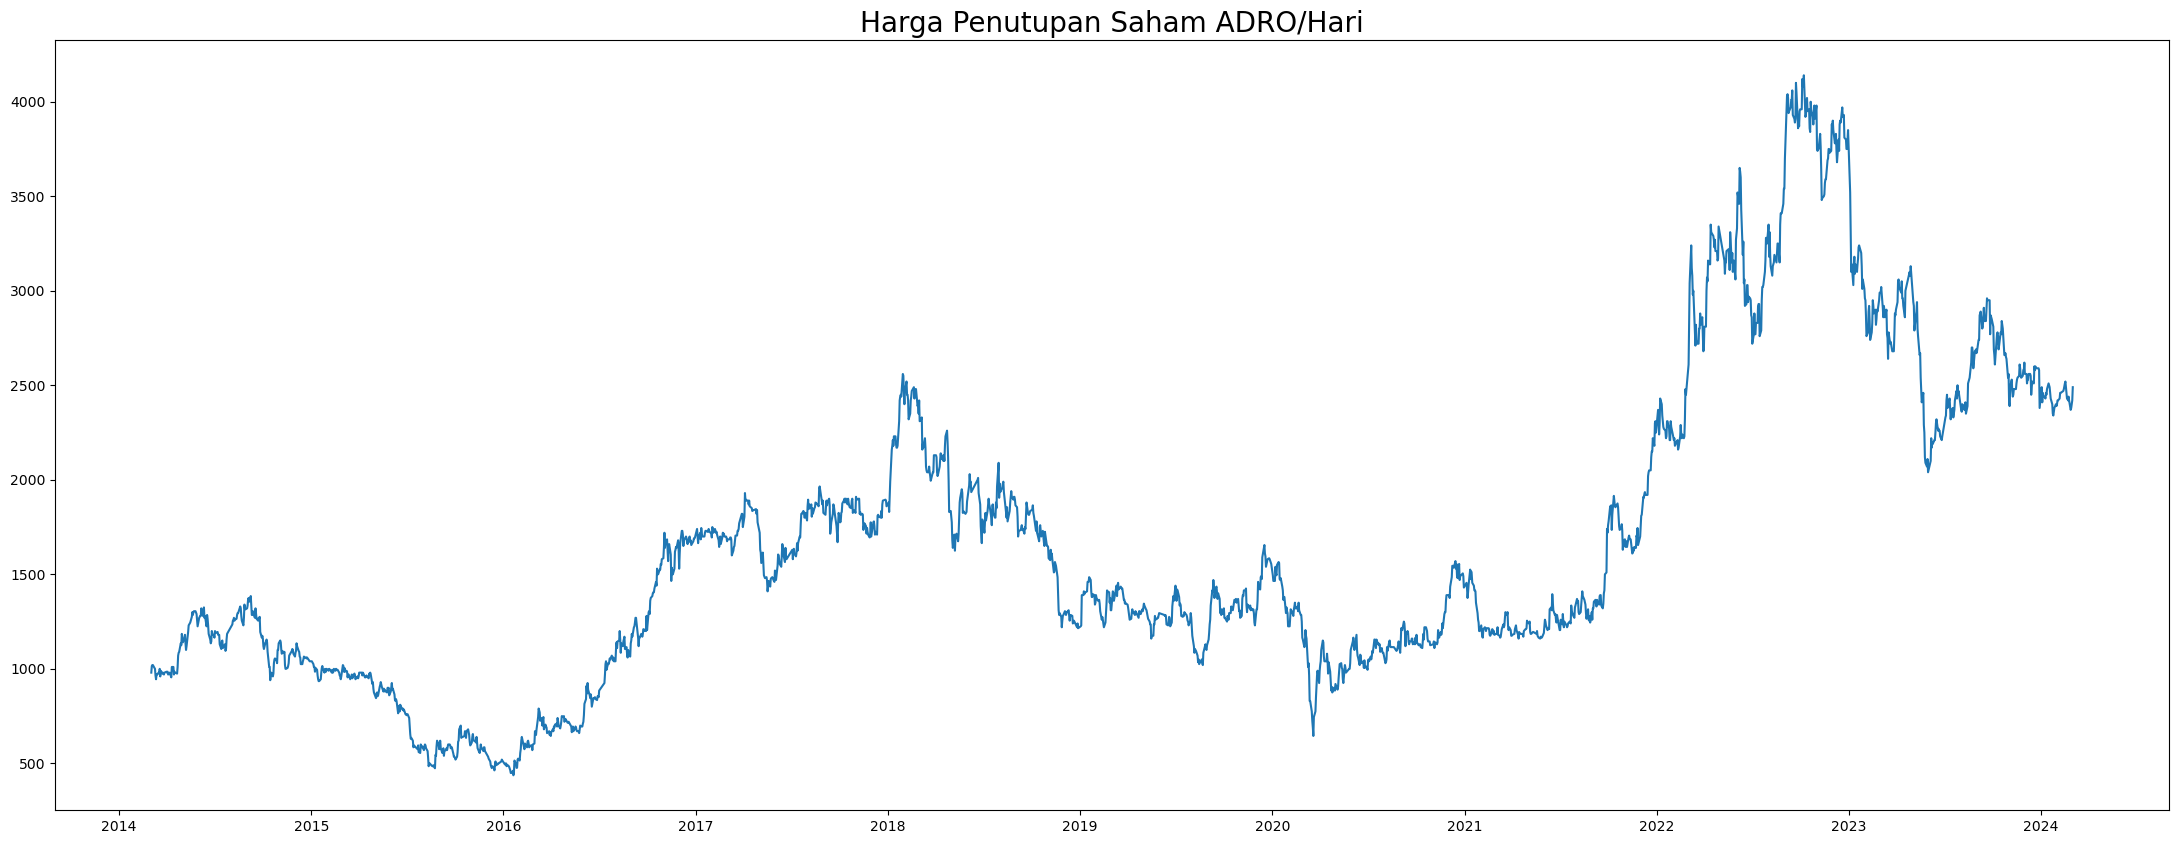

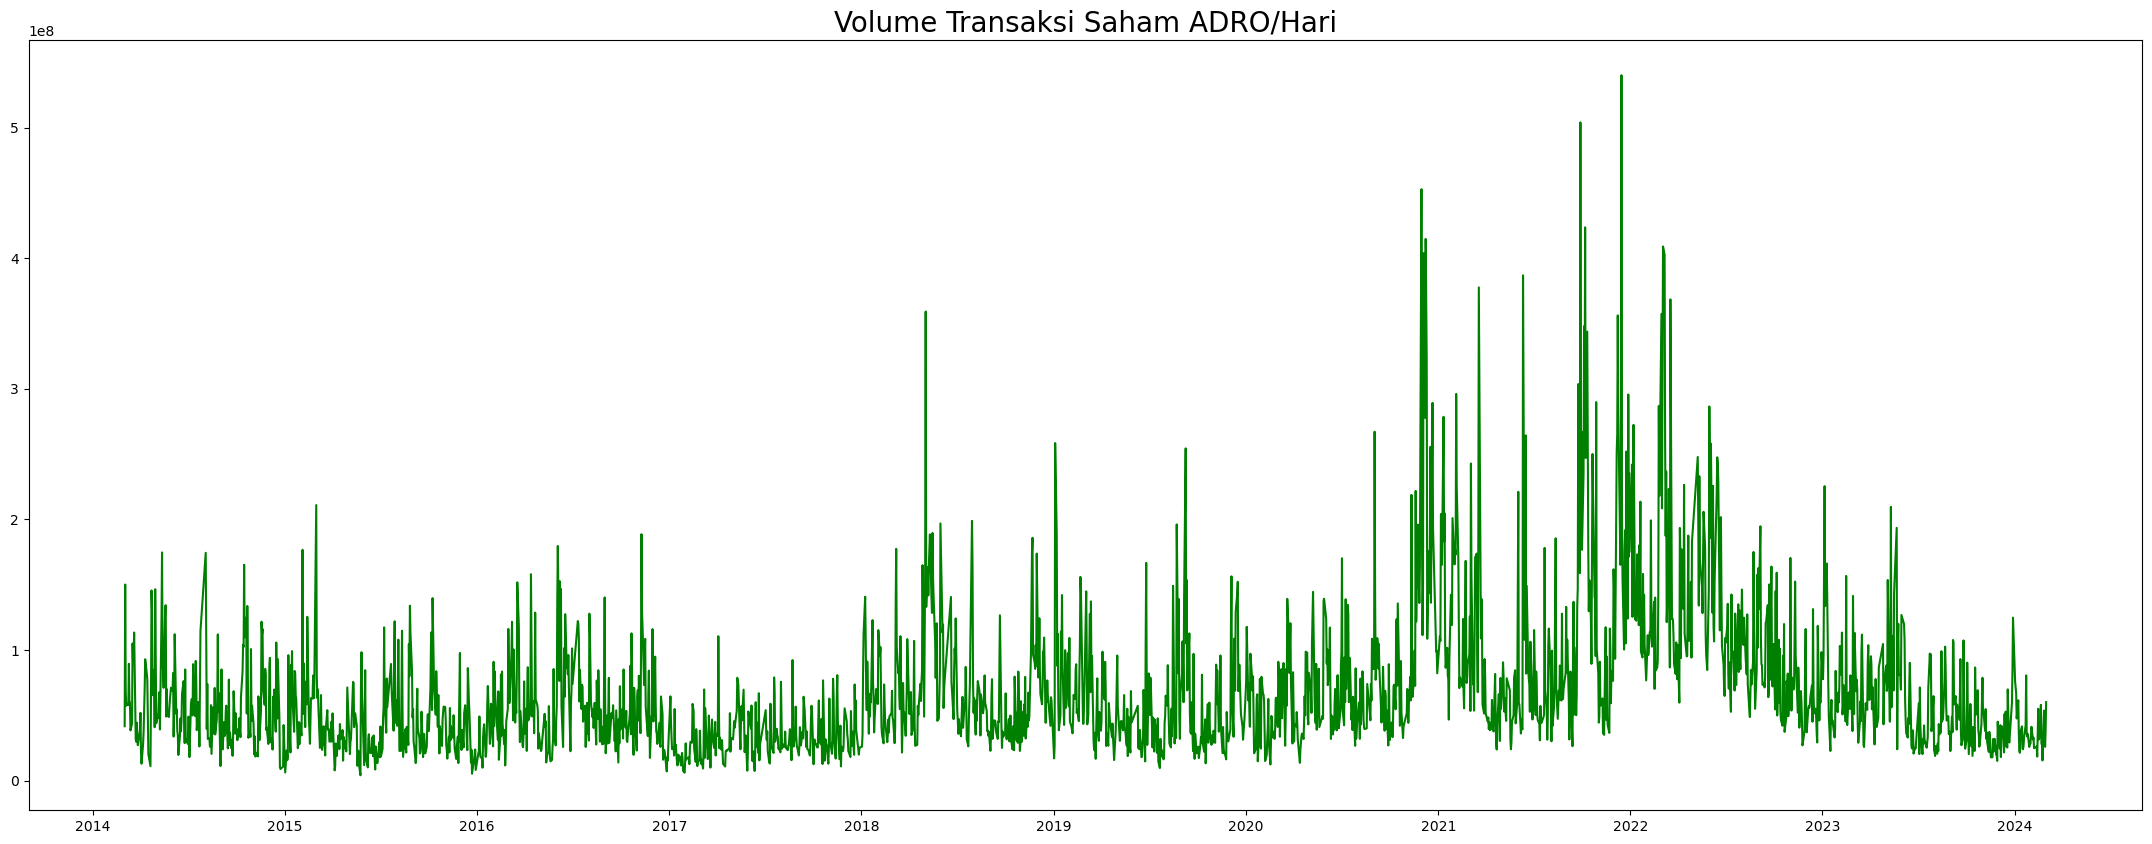

In [17]:
plt.figure(figsize=(60,10))

plt.subplot(1,2,1)
plt.plot(dataset['Tanggal'], dataset['Terakhir'])
plt.title('Harga Penutupan Saham ADRO/Hari', fontsize = 20)

plt.figure(figsize=(60,10))

plt.subplot(1,2,1)
plt.plot(dataset['Tanggal'], dataset['Vol'], 'g')
plt.title('Volume Transaksi Saham ADRO/Hari', fontsize = 20)

plt.show()

In [18]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu")
print(f"Using {device} device")

Using cuda device


In [19]:
data_use = np.column_stack((dataset['Terakhir'], dataset['Vol']))
tanggal_data = pd.DataFrame({'Tanggal' : dataset['Tanggal']})

print(data_use)
print(tanggal_data)

[[9.8000e+02 4.1650e+07]
 [1.0150e+03 1.5013e+08]
 [1.0200e+03 6.8200e+07]
 ...
 [2.4000e+03 2.5900e+07]
 [2.4200e+03 3.8750e+07]
 [2.4900e+03 6.0140e+07]]
        Tanggal
0    2014-03-03
1    2014-03-04
2    2014-03-05
3    2014-03-06
4    2014-03-07
...         ...
2426 2024-02-26
2427 2024-02-27
2428 2024-02-28
2429 2024-02-29
2430 2024-03-01

[2431 rows x 1 columns]


In [20]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_use)

In [21]:
seq_length = 1

x_train = []
y_train = []

seq_length = 10
for i in range (len(scaled_data) - seq_length):
    x_train.append(scaled_data[i:i + seq_length])
    y_train.append(scaled_data[i + seq_length, 0])
    
x_train = np.array(x_train)
y_train = np.array(y_train).reshape(-1, 1)

In [22]:
print(x_train)
print(y_train)

[[[0.14663786 0.07003434]
  [0.15608963 0.27246773]
  [0.15743989 0.11957901]
  ...
  [0.13718605 0.1060312 ]
  [0.14393732 0.1042211 ]
  [0.14393732 0.06410017]]

 [[0.15608963 0.27246773]
  [0.15743989 0.11957901]
  [0.15743989 0.09927596]
  ...
  [0.14393732 0.1042211 ]
  [0.14393732 0.06410017]
  [0.14663786 0.07380383]]

 [[0.15743989 0.11957901]
  [0.15743989 0.09927596]
  [0.15608963 0.10145929]
  ...
  [0.14393732 0.06410017]
  [0.14663786 0.07380383]
  [0.1452876  0.18836308]]

 ...

 [[0.5517148  0.0267224 ]
  [0.55981636 0.09507726]
  [0.56251687 0.05107487]
  ...
  [0.53551173 0.02118012]
  [0.52200913 0.09248339]
  [0.52470964 0.06057327]]

 [[0.55981636 0.09507726]
  [0.56251687 0.05107487]
  [0.53821224 0.05768083]
  ...
  [0.52200913 0.09248339]
  [0.52470964 0.06057327]
  [0.5301107  0.04064343]]

 [[0.56251687 0.05107487]
  [0.53821224 0.05768083]
  [0.53821224 0.1005449 ]
  ...
  [0.52470964 0.06057327]
  [0.5301107  0.04064343]
  [0.53551173 0.06462268]]]
[[0.146637

In [23]:
train_size = int(len(x_train) * 0.8)
x_train, x_test = x_train[:train_size], x_train[train_size:]
y_train, y_test = y_train[:train_size], y_train[train_size:]
tanggal_train, tanggal_test = tanggal_data[seq_length:train_size+seq_length], tanggal_data[train_size+seq_length:]

print(x_train.shape)
print(y_train.shape)
print(tanggal_train.shape)
print(y_test.shape)
print(tanggal_test.shape)

print(tanggal_test)

(1936, 10, 2)
(1936, 1)
(1936, 1)
(485, 1)
(485, 1)
        Tanggal
1946 2022-03-04
1947 2022-03-07
1948 2022-03-08
1949 2022-03-09
1950 2022-03-10
...         ...
2426 2024-02-26
2427 2024-02-27
2428 2024-02-28
2429 2024-02-29
2430 2024-03-01

[485 rows x 1 columns]


In [24]:
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [25]:
# Memastikan bentuk data benar
print(f"x_train_tensor shape: {x_train_tensor.shape}")  # (num_samples, seq_length, num_features)
print(f"y_train_tensor shape: {y_train_tensor.shape}")  # (num_samples, 1)
print(f"x_test_tensor shape: {x_test_tensor.shape}")    # (num_samples, seq_length, num_features)
print(f"y_test_tensor shape: {y_test_tensor.shape}")    # (num_samples, 1)

# Menampilkan contoh data dari x_train_tensor dan y_train_tensor
print("\nContoh data dari x_train_tensor:")
print(x_train_tensor[0])  # Menampilkan sampel pertama dari x_train_tensor

print("\nContoh data dari y_train_tensor:")
print(y_train_tensor[0])  # Menampilkan target pertama dari y_train_tensor

x_train_tensor shape: torch.Size([1936, 10, 2])
y_train_tensor shape: torch.Size([1936, 1])
x_test_tensor shape: torch.Size([485, 10, 2])
y_test_tensor shape: torch.Size([485, 1])

Contoh data dari x_train_tensor:
tensor([[0.1466, 0.0700],
        [0.1561, 0.2725],
        [0.1574, 0.1196],
        [0.1574, 0.0993],
        [0.1561, 0.1015],
        [0.1520, 0.1002],
        [0.1426, 0.1592],
        [0.1372, 0.1060],
        [0.1439, 0.1042],
        [0.1439, 0.0641]])

Contoh data dari y_train_tensor:
tensor([0.1466])


In [26]:
class StockPricePredictor(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(StockPricePredictor, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.gru1 = nn.GRU(hidden_size, hidden_size, num_layers, batch_first=True)
        self.lstm2 = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True)
        self.gru2 = nn.GRU(hidden_size, hidden_size, num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        h0_lstm1 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0_lstm1 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm1(x, (h0_lstm1, c0_lstm1))
        
        h0_gru1 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru1(out, h0_gru1)
        
        h0_lstm2 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0_lstm2 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm2(out, (h0_lstm2, c0_lstm2))
        
        h0_gru2 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru2(out, h0_gru2)
        
        out = self.fc(out[:, -1, :])
        return out

In [27]:
# Membuat TensorDataset dan DataLoader
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [28]:
print(f"x_train_tensor shape: {x_train_tensor.shape}")  # (num_samples, seq_length, num_features)
print(f"y_train_tensor shape: {y_train_tensor.shape}")  # (num_samples, 1)
print(f"x_test_tensor shape: {x_test_tensor.shape}")    # (num_samples, seq_length, num_features)
print(f"y_test_tensor shape: {y_test_tensor.shape}")    # (num_samples, 1)


x_train_tensor shape: torch.Size([1936, 10, 2])
y_train_tensor shape: torch.Size([1936, 1])
x_test_tensor shape: torch.Size([485, 10, 2])
y_test_tensor shape: torch.Size([485, 1])


In [29]:
input_size = x_train_tensor.shape[2]  # number of features, in this case 2
hidden_size = 64
num_layers = 2
num_epochs = 40
learning_rate = 0.001

# Initialize model, loss function, optimizer
model = StockPricePredictor(input_size, hidden_size, num_layers)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/40], Loss: 0.0130
Epoch [2/40], Loss: 0.0022
Epoch [3/40], Loss: 0.0007
Epoch [4/40], Loss: 0.0012
Epoch [5/40], Loss: 0.0010
Epoch [6/40], Loss: 0.0006
Epoch [7/40], Loss: 0.0008
Epoch [8/40], Loss: 0.0010
Epoch [9/40], Loss: 0.0005
Epoch [10/40], Loss: 0.0013
Epoch [11/40], Loss: 0.0007
Epoch [12/40], Loss: 0.0016
Epoch [13/40], Loss: 0.0012
Epoch [14/40], Loss: 0.0003
Epoch [15/40], Loss: 0.0006
Epoch [16/40], Loss: 0.0004
Epoch [17/40], Loss: 0.0003
Epoch [18/40], Loss: 0.0001
Epoch [19/40], Loss: 0.0003
Epoch [20/40], Loss: 0.0001
Epoch [21/40], Loss: 0.0004
Epoch [22/40], Loss: 0.0001
Epoch [23/40], Loss: 0.0002
Epoch [24/40], Loss: 0.0002
Epoch [25/40], Loss: 0.0004
Epoch [26/40], Loss: 0.0001
Epoch [27/40], Loss: 0.0001
Epoch [28/40], Loss: 0.0001
Epoch [29/40], Loss: 0.0003
Epoch [30/40], Loss: 0.0000
Epoch [31/40], Loss: 0.0001
Epoch [32/40], Loss: 0.0003
Epoch [33/40], Loss: 0.0002
Epoch [34/40], Loss: 0.0002
Epoch [35/40], Loss: 0.0001
Epoch [36/40], Loss: 0.0001
E

In [30]:
# Evaluation
model.eval()
with torch.no_grad():
    test_loss = 0
    predictions = []
    actuals = []
    for inputs, targets in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item()
        predictions.extend(outputs.cpu().numpy())
        actuals.extend(targets.cpu().numpy())

test_loss /= len(test_loader)
print(f'Test Loss: {test_loss:.4f}')

Test Loss: 0.0049


In [31]:
# Convert predictions and actuals to numpy arrays
predictions = np.array(predictions)
actuals = np.array(actuals)

In [32]:
# Predictions
model.eval()
with torch.no_grad():
    predictions = []
    for inputs, _ in test_loader:
        outputs = model(inputs)
        predictions.extend(outputs.cpu().numpy())

predictions = np.array(predictions)
print(predictions[:10])  # Menampilkan 10 prediksi pertama

[[0.57528555]
 [0.649212  ]
 [0.69078505]
 [0.6852414 ]
 [0.6776096 ]
 [0.6589027 ]
 [0.6601152 ]
 [0.61777085]
 [0.6043101 ]
 [0.6224561 ]]


In [33]:
# Membuat DataFrame untuk perbandingan hasil prediksi dan nilai aktual
comparison_df = pd.DataFrame({
    'Predicted': predictions.flatten(),
    'Actual': actuals.flatten()
})

# Menampilkan DataFrame
print(comparison_df)

     Predicted    Actual
0     0.575286  0.702944
1     0.649212  0.756954
2     0.690785  0.724548
3     0.685241  0.713746
4     0.677610  0.686740
..         ...       ...
480   0.525633  0.522009
481   0.515059  0.524710
482   0.518229  0.530111
483   0.520978  0.535512
484   0.525790  0.554415

[485 rows x 2 columns]


In [34]:
# Menghitung metrik
mse = mean_squared_error(actuals, predictions)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(actuals, predictions)

# Menampilkan hasil
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4%}")

MSE: 0.0051
RMSE: 0.0716
MAPE: 6.4045%


In [35]:
# Membuat Data Frame
train_df = pd.DataFrame({
    'Tanggal': tanggal_train['Tanggal'],
    'Value': y_train.flatten(),
    'Type': 'Train'
})

test_df = pd.DataFrame({
    'Tanggal': tanggal_test['Tanggal'],
    'Value': y_test.flatten(),
    'Type': 'Test'
})

predicted_df = pd.DataFrame({
    'Tanggal': tanggal_test['Tanggal'],
    'Value': predictions.flatten(),
    'Type': 'Predicted'
})

In [36]:
compact_df = pd.concat([test_df, predicted_df])

In [37]:
# Menggabungkan DataFrame
combined_df = pd.concat([train_df, test_df, predicted_df])

# Menampilkan DataFrame
print(combined_df)

        Tanggal     Value       Type
10   2014-03-17  0.146638      Train
11   2014-03-18  0.145288      Train
12   2014-03-19  0.152039      Train
13   2014-03-20  0.141237      Train
14   2014-03-21  0.149338      Train
...         ...       ...        ...
2426 2024-02-26  0.525633  Predicted
2427 2024-02-27  0.515059  Predicted
2428 2024-02-28  0.518229  Predicted
2429 2024-02-29  0.520978  Predicted
2430 2024-03-01  0.525790  Predicted

[2906 rows x 3 columns]


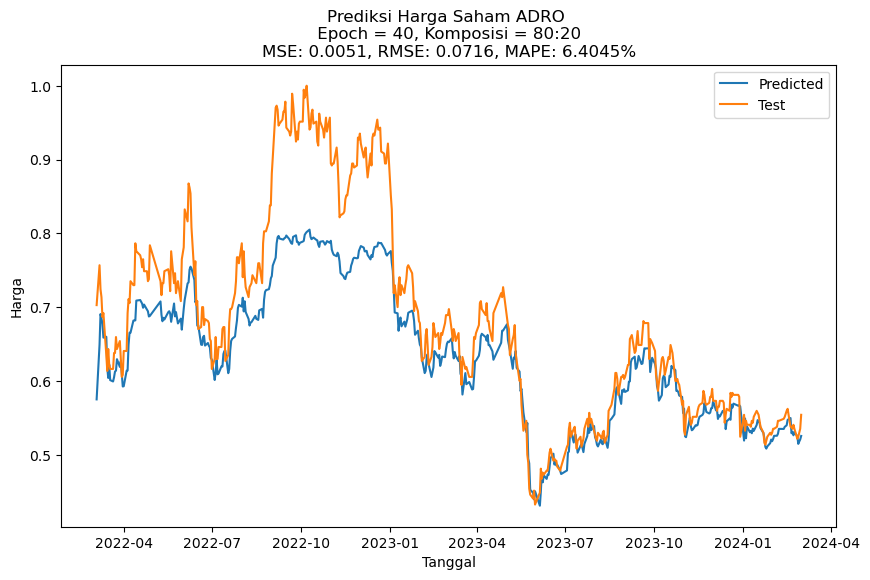

In [38]:
# Plotting hasil prediksi dan nilai aktual
plt.figure(figsize=(10, 6))
for label, df in compact_df.groupby('Type'):
    plt.plot(df['Tanggal'], df['Value'], label=label)
plt.title('Prediksi Harga Saham ADRO \n Epoch = 40, Komposisi = 80:20 \n' f"MSE: {mse:.4f}" ', ' f"RMSE: {rmse:.4f}" ', ' f"MAPE: {mape:.4%}")
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.show()

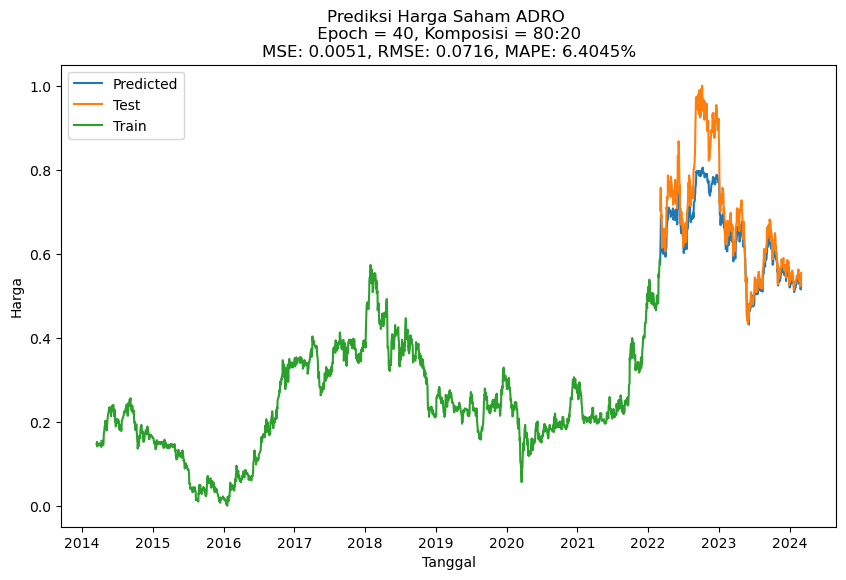

In [39]:
# Plotting hasil prediksi dan nilai aktual
plt.figure(figsize=(10, 6))
for label, df in combined_df.groupby('Type'):
    plt.plot(df['Tanggal'], df['Value'], label=label)
plt.title('Prediksi Harga Saham ADRO \n Epoch = 40, Komposisi = 80:20 \n' f"MSE: {mse:.4f}" ', ' f"RMSE: {rmse:.4f}" ', ' f"MAPE: {mape:.4%}")
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.show()